In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchlensmaker as tlm

rays aperture 0.0
rays aperture 2.7854004
rays aperture 2.5867348


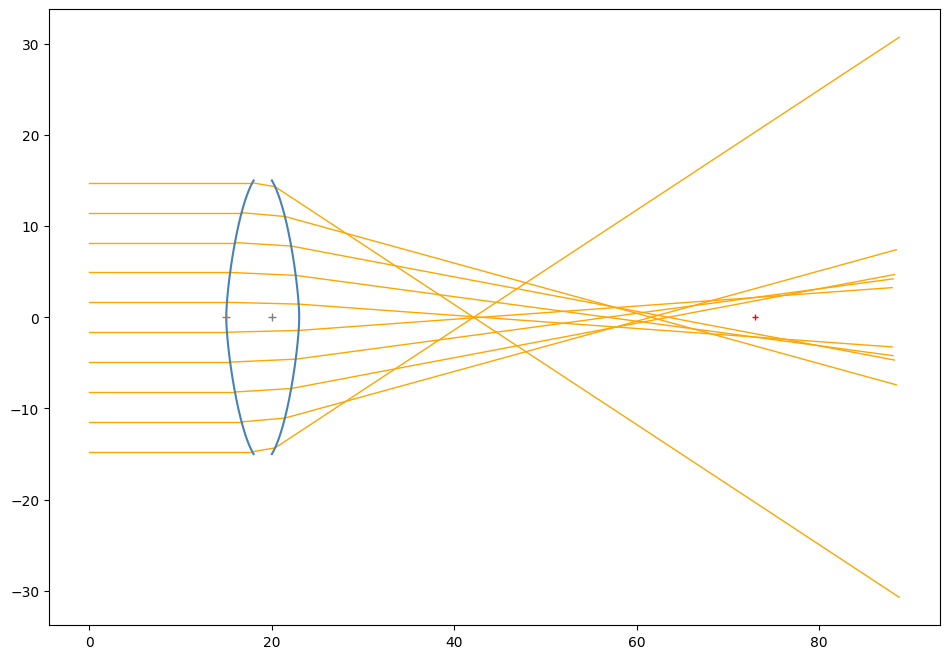

[  0/150] L= 61.939 | grad norm= 159.0580291748047


[  8/150] L= 23.468 | grad norm= 29.244749069213867


[ 16/150] L= 20.881 | grad norm= 42.860355377197266


[ 24/150] L= 13.112 | grad norm= 18.416934967041016


[ 32/150] L=  9.669 | grad norm= 20.73981475830078


[ 40/150] L=  6.181 | grad norm= 12.250446319580078


[ 48/150] L=  4.060 | grad norm= 10.5777006149292


[ 56/150] L=  2.536 | grad norm= 7.151180744171143


[ 64/150] L=  1.601 | grad norm= 5.524757385253906


[ 72/150] L=  1.008 | grad norm= 3.788757085800171


[ 80/150] L=  0.654 | grad norm= 2.7031116485595703


[ 88/150] L=  0.439 | grad norm= 1.7940256595611572


[ 96/150] L=  0.309 | grad norm= 1.27740478515625


[104/150] L=  0.225 | grad norm= 0.8202887177467346


[112/150] L=  0.168 | grad norm= 0.5793063044548035


[120/150] L=  0.127 | grad norm= 0.4081178307533264


[128/150] L=  0.096 | grad norm= 0.3409164249897003


[136/150] L=  0.072 | grad norm= 0.26504623889923096


[144/150] L=  0.053 | grad norm= 0.22492745518684387


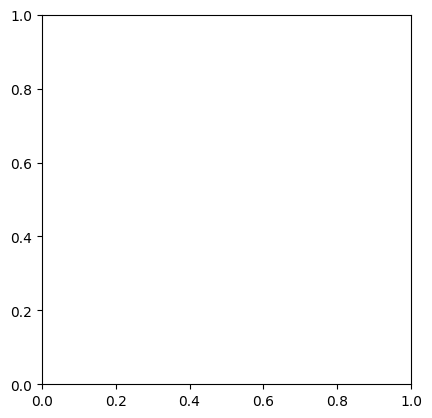

/home/victor/projects/torchlensmaker/src/torchlensmaker/training.py:82: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


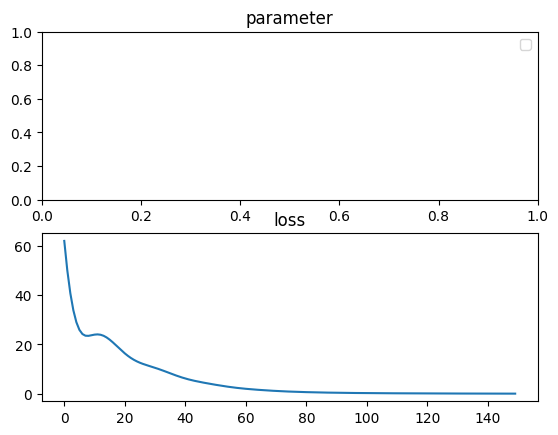

rays aperture 0.0
rays aperture 2.0146341
rays aperture 1.9661427


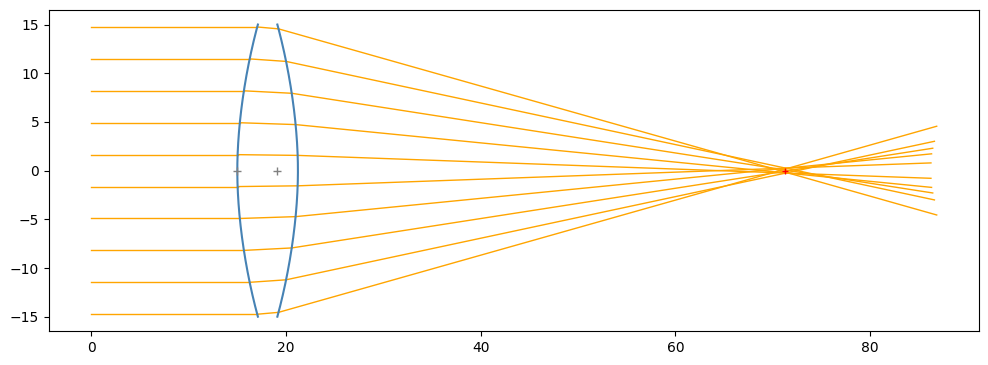

In [2]:
lens_radius = 15.0

class Optics(tlm.Module):
    def __init__(self):
        super().__init__()

        self.shape = tlm.BezierSpline(height=lens_radius*2,
            X=nn.Parameter(torch.tensor([3.0])),
            CX=nn.Parameter(torch.tensor([4.8])),
            CY=nn.Parameter(torch.tensor([0.2*lens_radius, 1.2*lens_radius])),
        )

        self.lens = tlm.SymmetricLens(self.shape, (1.0, 1.5), outer_thickness=2.)

        # TODO enforce CX > X, i.e. control point within knots

        self.optics = tlm.OpticalSequence(
            tlm.PointSourceAtInfinity(beam_diameter=0.99*lens_radius*2),
            tlm.Gap(15.),

            self.lens,
            
            tlm.Gap(50.0),
            tlm.FocalPoint(),
        )

    def forward(self, inputs, sampling):
        return self.optics(inputs, sampling)

optics = Optics()

tlm.render_plt(optics)

tlm.optimize(
    optics,
    optimizer = optim.Adam(optics.parameters(), 5e-2),
    sampling = {"rays": 10},
    num_iter = 150
)

tlm.render_plt(optics)